## 1.미리 준비할 것

In [44]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

## 2.이미지 읽어들이기

In [45]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj1/40/'

imgR, imgC, channel = 24,24,3
images =[]

for i in range(40):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (imgR, imgC, channel))
    images.append(img)


<Figure size 640x480 with 0 Axes>

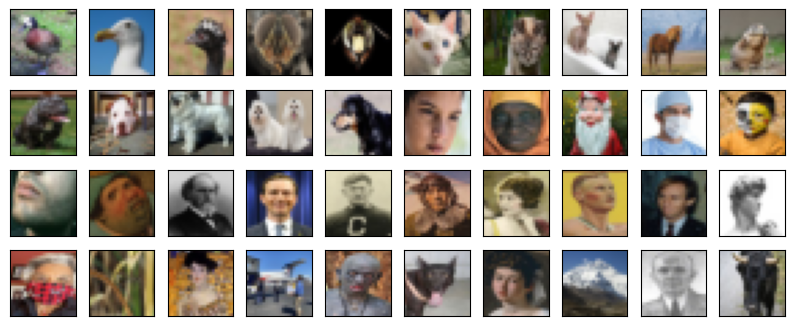

In [46]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis= ax[j]
            else:   axis=ax[i,j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])
plot_images(4, 10, images)

## 3.훈련용 데이터와 검증용 데이터 분리

<Figure size 640x480 with 0 Axes>

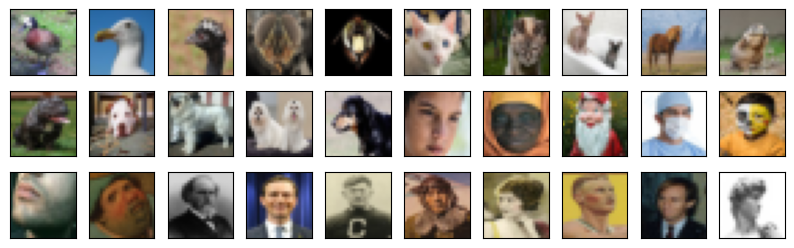

<Figure size 640x480 with 0 Axes>

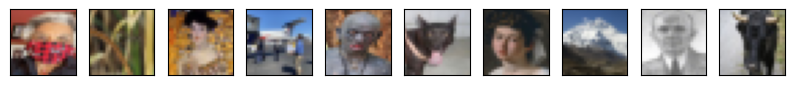

In [47]:
X = np.array(images[:30])
X_test = np.array(images[30:])
plot_images(3,10, X)
plot_images(1,10, X_test)

## 4.입력 데이터 준비

In [48]:
X_noisy = X + np.random.randn(len(X), imgR, imgC,channel)*0.1
print(X_noisy.shape)
X_noisy = np.clip(X_noisy, 0, 1)
X_test_noisy = X_test + np.random.randn(len(X_test), imgR, imgC, channel)*0.1
X_test_noisy = np.clip(X_test_noisy, 0,1)

(30, 24, 24, 3)


In [49]:
#np.random.randn?
np.clip?

<Figure size 640x480 with 0 Axes>

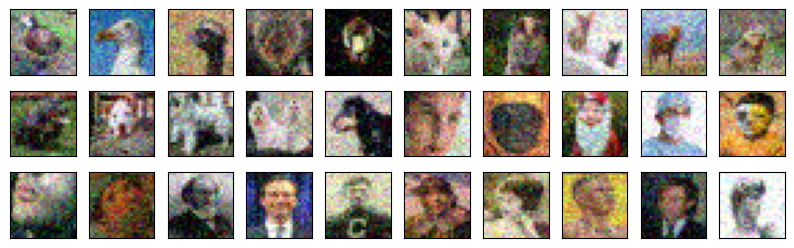

<Figure size 640x480 with 0 Axes>

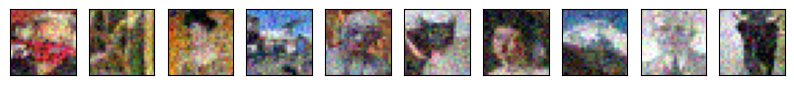

In [50]:
plot_images(3, 10, X_noisy)
plot_images(1, 10, X_test_noisy)

## 5.분류기 입출력 데이터 형식에 맞추어 훈련하기

In [51]:
# X_noisy_flat= X_noisy.reshape(-1, imgR*imgC*channel)
# X_flat = np.array(X.reshape(-1, imgR*imgC*channel)*255, dtype=np.uint)
X_noisy_flat= X_noisy.reshape(30, -1)
X_flat = np.array(X.reshape(30, -1)*255, dtype=np.uint)
print(X_noisy_flat.shape, X_flat.shape)
X_noisy_flat, X_flat

(30, 1728) (30, 1728)


(array([[0.25016215, 0.74727226, 0.55739872, ..., 0.4957438 , 0.62331707,
         0.45199239],
        [0.20147164, 0.4548912 , 0.52799302, ..., 0.37623696, 0.49049229,
         0.6632055 ],
        [0.7315997 , 0.58165792, 0.36209842, ..., 0.69932305, 0.51009077,
         0.29246223],
        ...,
        [0.70614636, 0.53980915, 0.14716522, ..., 0.79656966, 0.51124157,
         0.44898657],
        [0.03006775, 0.26645139, 0.0493771 , ..., 0.04842632, 0.10411574,
         0.20101749],
        [0.99919601, 0.89007242, 1.        , ..., 1.        , 0.98764618,
         1.        ]]),
 array([[117, 145, 117, ..., 145, 136, 135],
        [ 38, 103, 159, ...,  80, 136, 187],
        [189, 158, 117, ..., 175, 135, 101],
        ...,
        [165, 126,  62, ..., 177, 141, 109],
        [ 27,  46,  53, ...,  18,  21,  26],
        [255, 255, 255, ..., 251, 251, 251]], dtype=uint64))

In [52]:
X_noisy_flat= X_noisy.reshape(-1, imgR*imgC*channel)
X_flat = np.array(X.reshape(-1, imgR*imgC*channel)*255, dtype=np.uint)
# X_noisy_flat= X_noisy.reshape(30, -1)
# X_flat = np.array(X.reshape(30, -1)*255, dtype=np.uint)
print(X_noisy_flat.shape, X_flat.shape)
X_noisy_flat, X_flat

(30, 1728) (30, 1728)


(array([[0.25016215, 0.74727226, 0.55739872, ..., 0.4957438 , 0.62331707,
         0.45199239],
        [0.20147164, 0.4548912 , 0.52799302, ..., 0.37623696, 0.49049229,
         0.6632055 ],
        [0.7315997 , 0.58165792, 0.36209842, ..., 0.69932305, 0.51009077,
         0.29246223],
        ...,
        [0.70614636, 0.53980915, 0.14716522, ..., 0.79656966, 0.51124157,
         0.44898657],
        [0.03006775, 0.26645139, 0.0493771 , ..., 0.04842632, 0.10411574,
         0.20101749],
        [0.99919601, 0.89007242, 1.        , ..., 1.        , 0.98764618,
         1.        ]]),
 array([[117, 145, 117, ..., 145, 136, 135],
        [ 38, 103, 159, ...,  80, 136, 187],
        [189, 158, 117, ..., 175, 135, 101],
        ...,
        [165, 126,  62, ..., 177, 141, 109],
        [ 27,  46,  53, ...,  18,  21,  26],
        [255, 255, 255, ..., 251, 251, 251]], dtype=uint64))

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_noisy_flat, X_flat)

KNeighborsClassifier()

<Figure size 640x480 with 0 Axes>

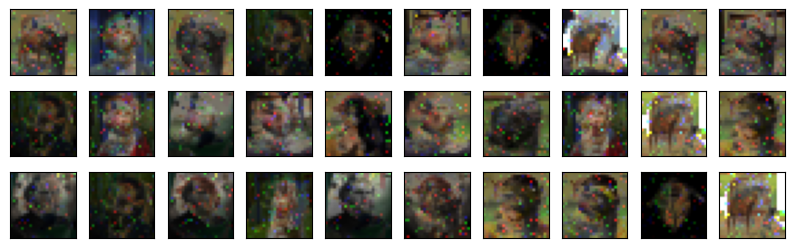

In [54]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)
plot_images(3, 10, denoised_result)

In [55]:
a1 = np.arange(30).reshape(3,2,5)
a2 = np.arange(30).reshape(3, 2,5)+1

a1,a2

(array([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],
 
        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],
 
        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]]),
 array([[[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]],
 
        [[11, 12, 13, 14, 15],
         [16, 17, 18, 19, 20]],
 
        [[21, 22, 23, 24, 25],
         [26, 27, 28, 29, 30]]]))

In [56]:
np.append(a1, a2, axis=0).shape

(6, 2, 5)

##6.데이터를 증강하여 훈련 효과 높이기

In [57]:
n_augmentation = 100
X_noisy_aug = X + np.random.rand(len(X), imgR, imgC, channel)*0.2
y_label = np.array(X*255, dtype=np.uint)
y = y_label

print(X_noisy.shape)
for i in range(n_augmentation):
    noisy_data = X+ np.random.randn(len(X), imgR, imgC, channel) * 0.2
    X_noisy_aug = np.append(X_noisy_aug, noisy_data, axis=0)
    y = np.append(y, y_label, axis=0 )

X_noisy_aug = np.clip(X_noisy_aug, 0, 1)
X_noisy_aug.shape, y.shape

(30, 24, 24, 3)


((3030, 24, 24, 3), (3030, 24, 24, 3))

<Figure size 640x480 with 0 Axes>

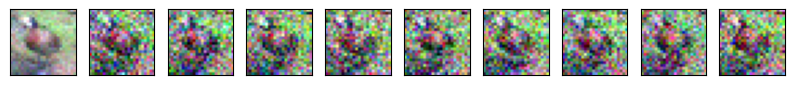

In [58]:
plot_images(1, 10, X_noisy_aug[0:300:30])

In [59]:
X_noisy_aug_flat = X_noisy_aug.reshape(-1, imgR*imgC * channel)
y_flat = y.reshape(-1, imgR*imgC*channel)
knn.fit(X_noisy_aug_flat, y_flat)

KNeighborsClassifier()

<Figure size 640x480 with 0 Axes>

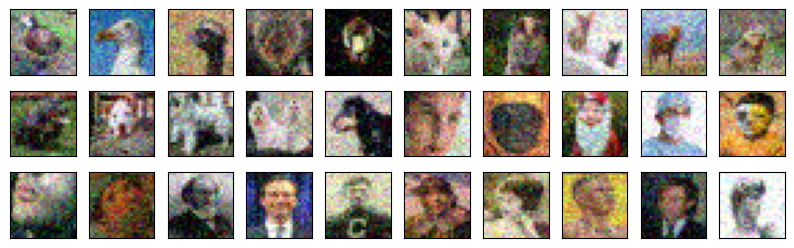

<Figure size 640x480 with 0 Axes>

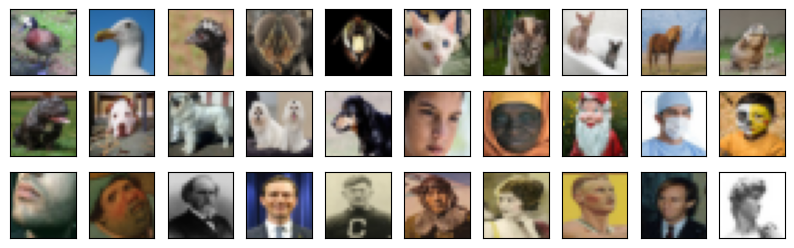

In [60]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)

plot_images(3, 10, X_noisy)
plot_images(3, 10, denoised_result)

## 7.검증 데이터로 일반화 능력을 살펴보자

In [61]:
np.random.randint(0, 20)

6

(10, 1728)


<Figure size 640x480 with 0 Axes>

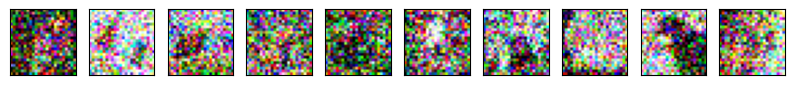

<Figure size 640x480 with 0 Axes>

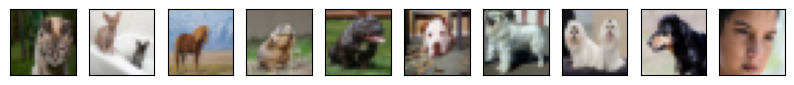

In [62]:
rndidx = np.random.randint(0,20)
data = X[rndidx:rndidx+10] + np.random.randn(10, imgR, imgC, channel) *0.4
data = np.clip(data, 0, 1)
data_flat = data.reshape(-1, imgR*imgC*channel)
print(data_flat.shape)

denoised = knn.predict(data_flat)
denoised = denoised.reshape(-1, imgR, imgC, channel)
denoised = np.clip(denoised, 0,255)

plot_images(1, 10, data)
plot_images(1, 10, denoised)

<Figure size 640x480 with 0 Axes>

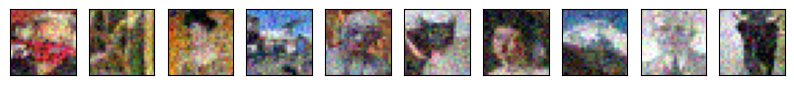

<Figure size 640x480 with 0 Axes>

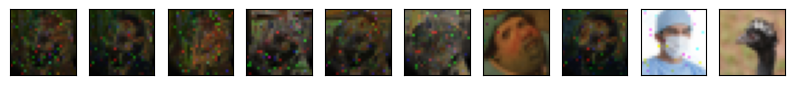

In [63]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)

## 8.데이터 증강으로 일반화 능력을 높여보자

In [64]:
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range=360,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [65]:
y_aug = X.reshape(-1, imgR, imgC, channel)
it = image_generator.flow(y_aug)
nData = y_aug.shape[0]

In [66]:
X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel) *0.1

In [67]:
n_augmentation = 500
for _ in range(n_augmentation):
    new_y = it.next()
    new_X = new_y + np.random.randn(nData, imgR, imgC, channel)*0.1
    y_aug = np.append(y_aug, new_y)
    X_aug = np.append(X_aug, new_X)

y_aug = np.array(y_aug*255, dtype=np.uint)
y_aug = y_aug.reshape(-1, imgR, imgC, channel)
X_aug = X_aug.reshape(-1, imgR, imgC, channel)

<Figure size 640x480 with 0 Axes>

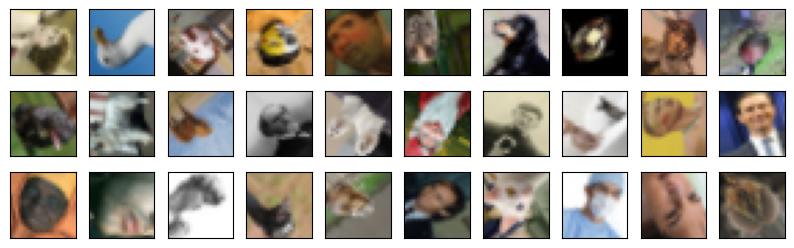

In [68]:
y_aug = np.clip(y_aug, 0, 255)
X_aug = np.clip(X_aug, 0, 1)
plot_images(3, 10, y_aug[30:])

## 9.새로 학습하고 검증용 데이터 적용하기

In [69]:
X_aug_flat = X_aug.reshape(-1, imgR*imgC*channel)
y_aug_flat = y_aug.reshape(-1, imgR*imgC*channel)
knn.fit(X_aug_flat, y_aug_flat)

KNeighborsClassifier()

<Figure size 640x480 with 0 Axes>

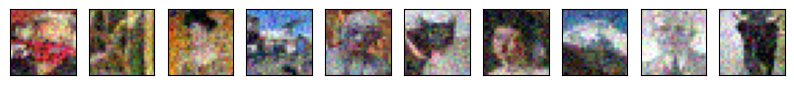

<Figure size 640x480 with 0 Axes>

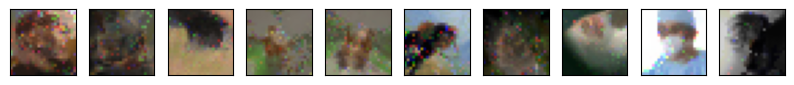

In [70]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)

<Figure size 640x480 with 0 Axes>

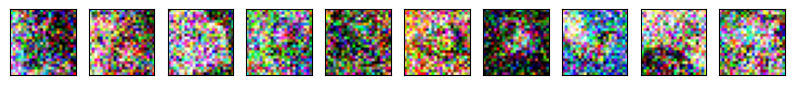

<Figure size 640x480 with 0 Axes>

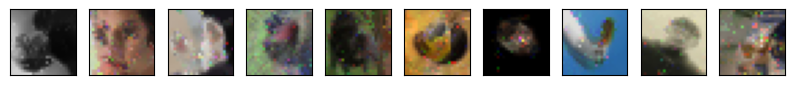

In [71]:
images = it.next()
testX = images + np.random.randn(nData, imgR, imgC, channel)*0.4
testX = np.clip(testX, 0, 1)
denoised = knn.predict(testX.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, testX)
plot_images(1, 10, denoised)

<Figure size 640x480 with 0 Axes>

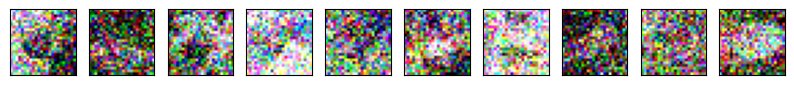

<Figure size 640x480 with 0 Axes>

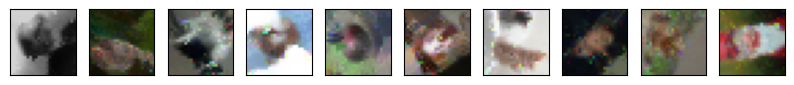

In [72]:
images = it.next()
testX = images + np.random.randn(nData, imgR, imgC, channel)*0.4
testX = np.clip(testX, 0, 1)
denoised = knn.predict(testX.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, testX)
plot_images(1, 10, denoised)